In [6]:
# Import packages

import os
import tarfile
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.float_format','{:.4f}'.format)

In [2]:
# Load the data
df=pd.read_csv('C:/Users/dmuth/Downloads/Compressed/train.csv')
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.4450
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.4500
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.5300
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.5350
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.4150


**Our Problem Statement**

- To create a model that can predict the median_house_value, This is regression problem

**Data Cleaning**

In [4]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,...,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000,1117957.0000
mean,558978.0000,4.9215,4.9267,4.9553,4.9422,4.9425,4.9341,4.9559,4.9278,4.9426,...,4.9469,4.9540,4.9314,4.9290,4.9259,4.9275,4.9509,4.9406,4.9390,0.5045
std,322726.5318,2.0564,2.0939,2.0722,2.0517,2.0834,2.0577,2.0831,2.0660,2.0685,...,2.0723,2.0889,2.0783,2.0824,2.0648,2.0742,2.0687,2.0811,2.0904,0.0510
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2850
25%,279489.0000,3.0000,3.0000,4.0000,4.0000,3.0000,3.0000,4.0000,3.0000,3.0000,...,4.0000,3.0000,3.0000,3.0000,3.0000,3.0000,4.0000,3.0000,3.0000,0.4700
50%,558978.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,...,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,0.5050
75%,838467.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,...,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,0.5400
max,1117956.0000,16.0000,18.0000,16.0000,17.0000,17.0000,17.0000,16.0000,16.0000,16.0000,...,17.0000,17.0000,16.0000,16.0000,17.0000,18.0000,19.0000,16.0000,16.0000,0.7250


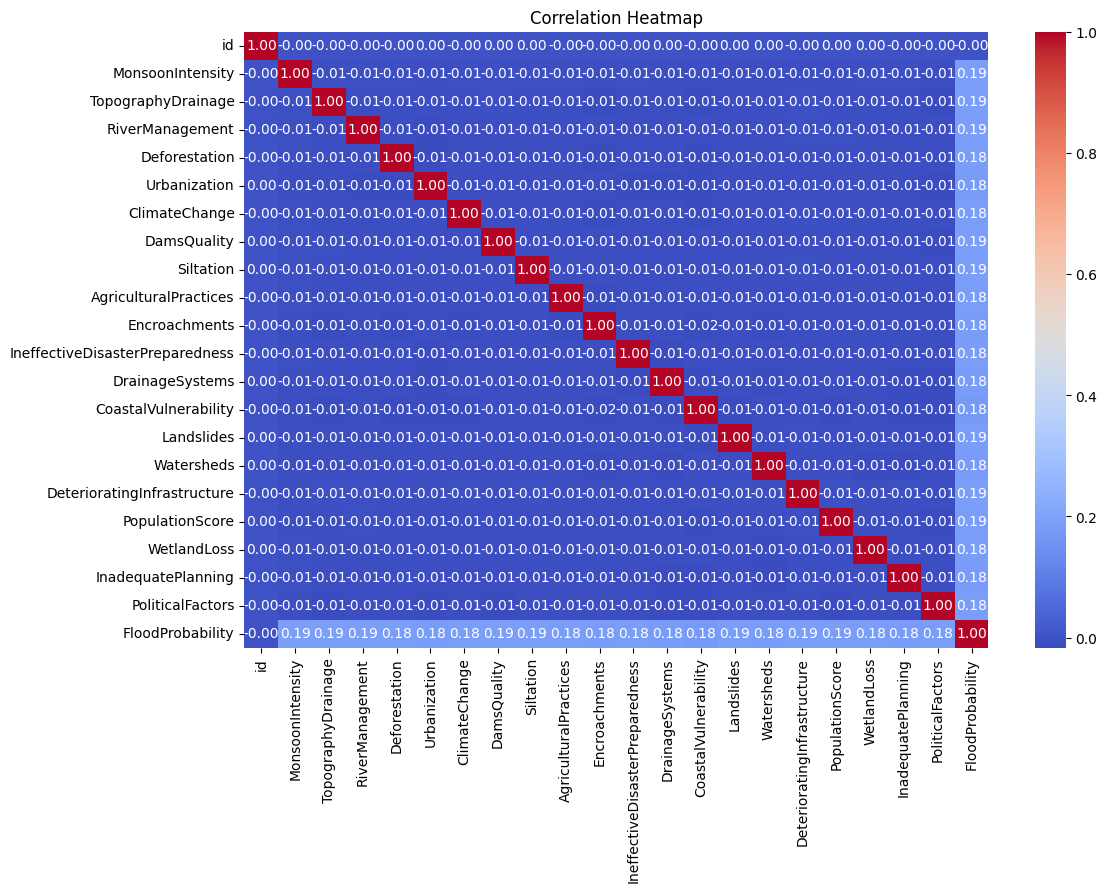

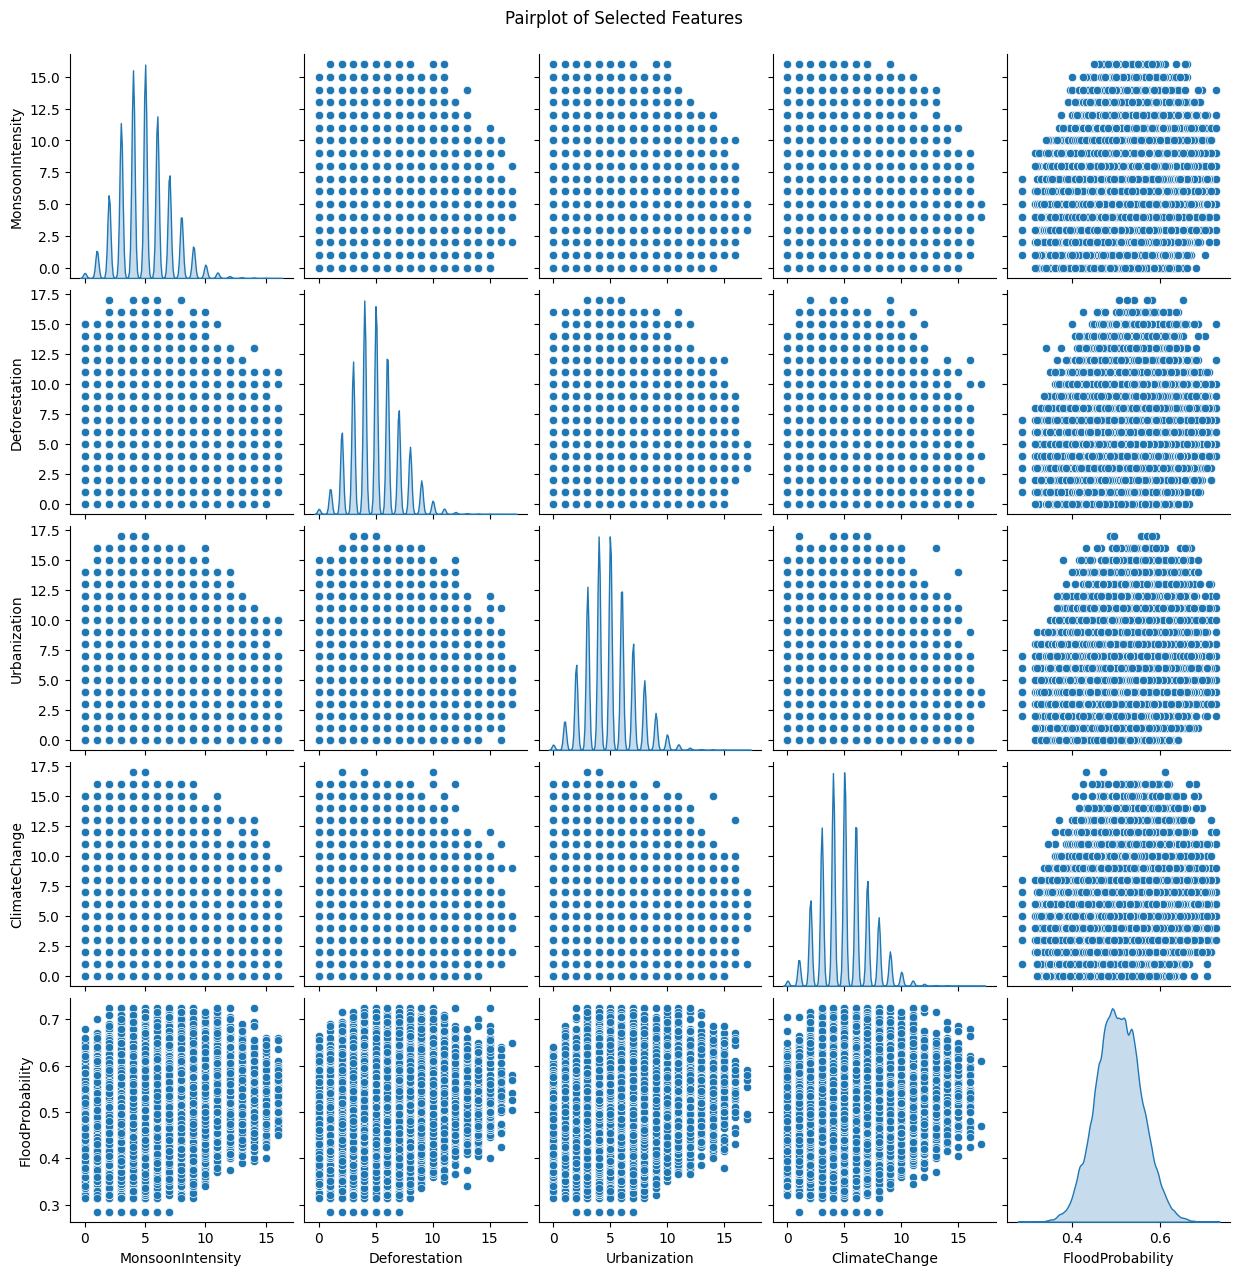

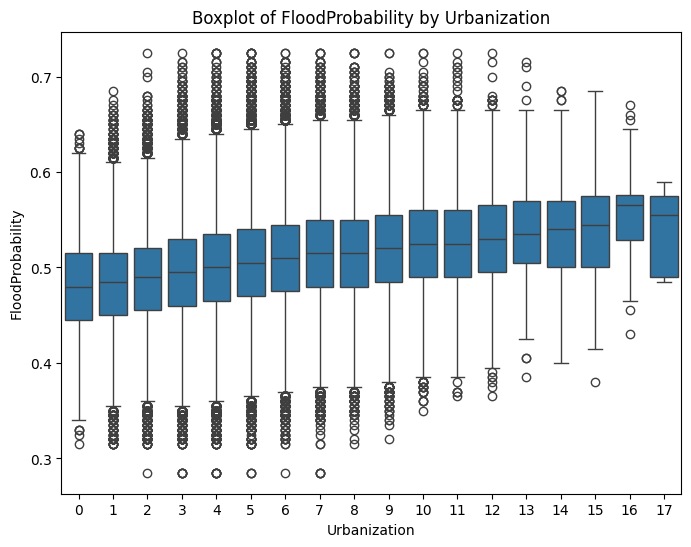

c:\Users\dmuth\.conda\envs\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


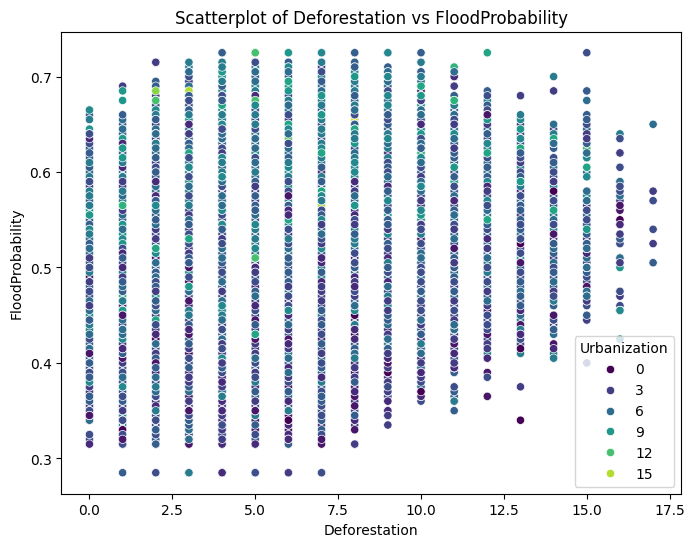

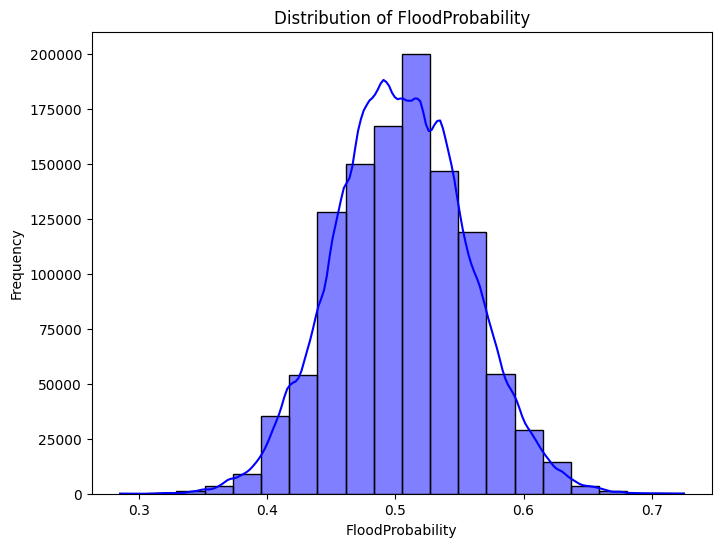

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 2: Pairplot of selected features
selected_features = ['MonsoonIntensity', 'Deforestation', 'Urbanization', 'ClimateChange', 'FloodProbability']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Visualization 3: Boxplot of FloodProbability by Urbanization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Urbanization', y='FloodProbability', data=df)
plt.title('Boxplot of FloodProbability by Urbanization')
plt.show()

# Visualization 4: Scatterplot of Deforestation vs FloodProbability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Deforestation', y='FloodProbability', data=df, hue='Urbanization', palette='viridis')
plt.title('Scatterplot of Deforestation vs FloodProbability')
plt.show()

# Visualization 5: Distribution of FloodProbability
plt.figure(figsize=(8, 6))
sns.histplot(df['FloodProbability'], kde=True, bins=20, color='blue')
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.show()

**Data Feature engineering**


**Create a Test & Train**

In [6]:
from sklearn.model_selection import train_test_split


# First we split data into Target and Input Features

X = df.drop(columns=['FloodProbability','id']).values
y = df['FloodProbability'].values

X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
X_train.shape , X_test.shape


((894365, 20), (223592, 20))

In [8]:
X_train

array([[ 8,  7,  7, ...,  6,  4,  7],
       [ 7,  4,  4, ...,  4,  3,  4],
       [ 6,  5,  1, ...,  3,  5,  3],
       ...,
       [ 5,  4,  1, ...,  6,  7,  7],
       [ 6, 10,  4, ...,  4,  5,  5],
       [ 5,  7,  2, ...,  4,  4,  7]], dtype=int64)

In [9]:
y_train.shape , y_test.shape

((894365,), (223592,))

**Now Lets use our regressor Models**

For this example we will work with 3

1. Linear Regression
2. Random Forest regessor
3. DecisionTreeRegressor

---
---

And since we are working with regression models our evaluation metrics we will use

1. MSE - Mean Squared Error
2. RMSE - Root Mean Squared Error
3. MAPE - Mean Absolute Percentaga Error
4. R2 Adjusted

In [10]:
# Lets use our regressors models to create Base Models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics      import mean_absolute_percentage_error , mean_squared_error ,r2_score

from math import sqrt

"""model = LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)"""

# create an instance of the model
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor()
        #   LogisticRegression()
          ]


results ={}

for model in models:
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    results['model_name'] = model.__class__.__name__

    # Evaluate
    mse_score  = mean_squared_error(y_test,y_preds)
    rmse_score = sqrt(mse_score)
    mape_score = mean_absolute_percentage_error(y_test,y_preds)
    r_score    = r2_score(y_test,y_preds)

    # Store the results
    results[model.__class__.__name__] = {
        'MSE' : mse_score,
        'RMSE': rmse_score,
        'MAPE': mape_score,
        'R^2' : r_score
        }

results

{'model_name': 'LinearRegression',
 'LinearRegression': {'MSE': 0.0004032065870905584,
  'RMSE': 0.0200800046586289,
  'MAPE': 0.03187264659393837,
  'R^2': 0.8448773362840328}}

In [16]:
# Remove the 'model_name' key if present
results.pop('model_name', None)

# Convert the cleaned results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,MSE,RMSE,MAPE,R^2
LinearRegression,0.00,0.02,0.03,0.84
DecisionTreeRegressor,0.00,0.05,0.08,0.06
RandomForestRegressor,0.00,0.03,0.05,0.65
GradientBoostingRegressor,0.00,0.03,0.05,0.61


**Fine Tune the Model Our Linear Regressor**

In [38]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
linear=LinearRegression()
ridge = Ridge()  # Modify alpha to control regularization strength
lasso = Lasso()
ridge_results=ridge.fit(X_train, y_train)
lasso_results=lasso.fit(X_train, y_train)

In [43]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline

param_grid = {
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1],     # Regularization strength
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 1.0],          # Mix ratio of Lasso and Ridge
    'elasticnet__fit_intercept': [True, False]             # Whether to fit the intercept
}

# Create a pipeline to include scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Standardize features
    ('elasticnet', ElasticNet())         # Name of the model in the pipeline
])

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best parameters: {'elasticnet__alpha': 0.0001, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.1}


In [45]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best parameters:", grid_search.best_params_)
print("Test MSE after fine-tuning:", mse)
rmse = sqrt(mse)
r2   = r2_score(y_test, y_preds)

print("RMSE:", rmse)
print("R^2:", r2)


Best parameters: {'elasticnet__alpha': 0.0001, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.1}
Test MSE after fine-tuning: 0.0004032086439436869
RMSE: 0.020080055875014064
R^2: 0.8448773373610838


A slight improvement of RMSE and MSE

In [86]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_optimized_model.pkl')


['best_optimized_model.pkl']

In [87]:
# Load the model
loaded_model = joblib.load('best_optimized_model.pkl')
loaded_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.0001, l1_ratio=0.1))])

In [89]:
test_data=pd.read_csv('./test.csv')
new_data=test_data.drop(columns=['id'])

In [103]:
# Make predictions
predictions = loaded_model.predict(new_data)

c:\Users\dmuth\.conda\envs\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\dmuth\.conda\envs\venv\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\dmuth\.conda\envs\venv\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\dmuth\.conda\envs\venv\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [80]:
from sklearn.metrics import mean_absolute_error

actual_values = df['FloodProbability'].values[:745305]
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

# Print regression metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {-r2}')

Mean Absolute Error: 0.05482823157957511
Mean Squared Error: 0.004789775230817799
R² Score: 0.8443649529707027


In [101]:
new_df=pd.DataFrame(data=[actual_values,predictions],index=['Actual Values','Predicted Values']).transpose()
new_df

,Actual Values,Predicted Values
0,0.4450,0.5735
1,0.4500,0.4553
2,0.5300,0.4548
3,0.5350,0.4662
4,0.4150,0.4661
...,...,...
745300,0.6000,0.4772
745301,0.4550,0.4494
745302,0.5850,0.6242
745303,0.4450,0.5509
